In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
df1=pd.read_csv("lipo.csv")
df2=pd.read_csv("logP_dataset.csv")

df1=df1.dropna()
df2=df2.dropna()

In [3]:
df1.head()

,CMPD_CHEMBLID,exp,smiles
0,CHEMBL596271,3.54,Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14
1,CHEMBL1951080,-1.18,COc1cc(OC)c(cc1NC(=O)CSCC(=O)O)S(=O)(=O)N2C(C)...
2,CHEMBL1771,3.69,COC(=O)[C@@H](N1CCc2sccc2C1)c3ccccc3Cl
3,CHEMBL234951,3.37,OC[C@H](O)CN1C(=O)C(Cc2ccccc12)NC(=O)c3cc4cc(C...
5,65079,3.10,Cc1cccc(C[C@H](NC(=O)c2cc(nn2C)C(C)(C)C)C(=O)N...


In [4]:
df1.shape

(4200, 3)

In [5]:
df2.head()

,smiles,logp
0,C[C@H]([C@@H](C)Cl)Cl,2.3
1,C(C=CBr)N,0.3
2,CCC(CO)Br,1.3
3,[13CH3][13CH2][13CH2][13CH2][13CH2][13CH2]O,2.0
4,CCCOCCP,0.6


In [6]:
smiles1=df1['smiles']
smiles2=df2['smiles']
y_logp=df2['logp']
y_logd=df1['exp']

In [7]:
#Model for logd

import numpy as np

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs


mols=[Chem.MolFromSmiles(i) for i in smiles1] 



for mol in mols:
    AllChem.Compute2DCoords(mol)
X = []
for mol in mols:
    arr = np.zeros((0,))
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
    DataStructs.ConvertToNumpyArray(fp, arr)
    X.append(arr)

In [8]:
from sklearn.ensemble import RandomForestRegressor

reg=RandomForestRegressor()
reg.fit(X,y_logd)
pred_logd=reg.predict(X)

In [9]:
import seaborn as sns
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

In [10]:
r2(y_logd,pred_logd)

0.955814279752531

/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='exp'>

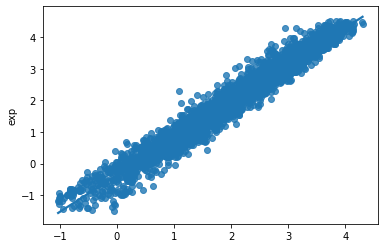

In [11]:
sns.regplot(pred_logd, y_logd)

In [12]:
import numpy as np

mols=[Chem.MolFromSmiles(i) for i in smiles2] 

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs

for mol in mols:
    AllChem.Compute2DCoords(mol)
Z = []
for mol in mols:
    arr = np.zeros((0,))
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
    DataStructs.ConvertToNumpyArray(fp, arr)
    Z.append(arr)

In [13]:
from sklearn.ensemble import RandomForestRegressor

reg2=RandomForestRegressor()
reg2.fit(Z,y_logp)
pred_logp=reg2.predict(Z)

In [14]:
r2(y_logp,pred_logp)

0.9792799862315241

/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='logp'>

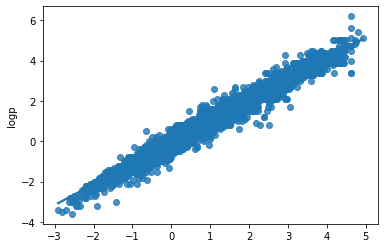

In [15]:
sns.regplot(pred_logp, y_logp)

In [16]:
full=[]

for i in X:
    full.append(i)
    
for i in Z:
    full.append(i)


In [17]:
full_logp=reg.predict(full)
full_logd=reg2.predict(full)

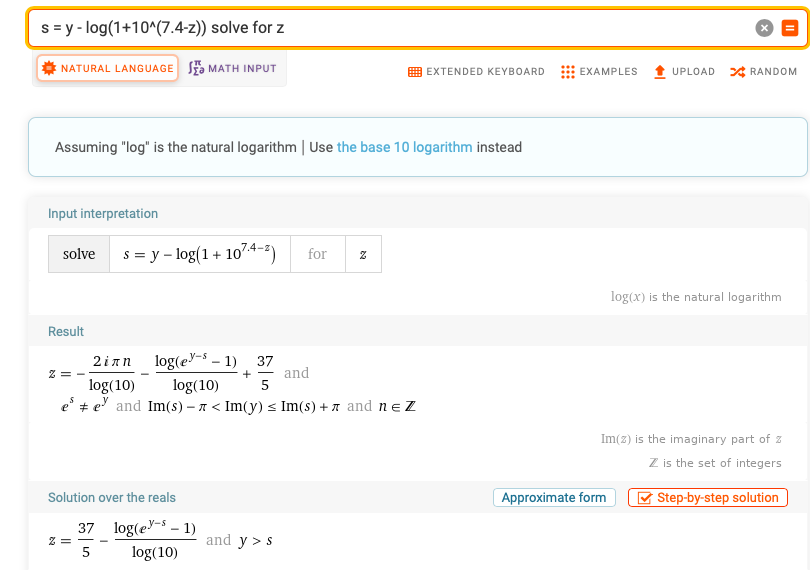

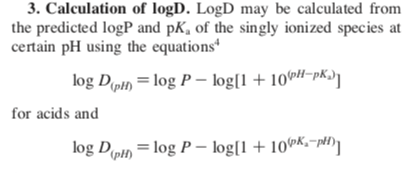

In [83]:
def pka_acidic(lp,ld):
    res=7.4+0.434294*np.log((-2.71828**(-2.30259*ld))*(2.71828**(2.30259*ld)-2.71828**(2.30259*lp)))
    return res

def pka_basic(lp,ld):
    res=7.4-0.434294*np.log((-2.71828**(-2.30259*ld))*(2.71828**(2.30259*ld)-2.71828**(2.30259*lp)))
    return res


In [84]:
pka_vals_acidic=[]
pka_vals_basic=[]

for i in np.arange(0,full_logp.shape[0]):
    pka_vals_acidic.append(pka_acidic(full_logp[i],full_logd[i]))
    
for i in np.arange(0,full_logp.shape[0]):
    pka_vals_basic.append(pka_basic(full_logp[i],full_logd[i]))    

/var/folders/g9/l25fspz53p158gw5zp6t0l640000gn/T/ipykernel_884/867414669.py:2: RuntimeWarning: invalid value encountered in log
  res=7.4+0.434294*np.log((-2.71828**(-2.30259*ld))*(2.71828**(2.30259*ld)-2.71828**(2.30259*lp)))
/var/folders/g9/l25fspz53p158gw5zp6t0l640000gn/T/ipykernel_884/867414669.py:6: RuntimeWarning: invalid value encountered in log
  res=7.4-0.434294*np.log((-2.71828**(-2.30259*ld))*(2.71828**(2.30259*ld)-2.71828**(2.30259*lp)))


In [85]:
full = np.array(full)
pka_vals_acidic=np.array(pka_vals_acidic)
pka_vals_basic=np.array(pka_vals_basic)


In [86]:
delete_pos_1=[]
delete_pos_2=[]

for i in np.arange(0,np.argwhere(~np.isnan(pka_vals_acidic)).shape[0]):
    delete_pos_1.append(np.argwhere(~np.isnan(pka_vals_acidic))[i][0])
    
for i in np.arange(0,np.argwhere(~np.isnan(pka_vals_basic)).shape[0]):
    delete_pos_2.append(np.argwhere(~np.isnan(pka_vals_basic))[i][0])    

In [87]:
full_new_acidic=[]
full_new_basic=[]

for i in delete_pos_1:
    full_new_acidic.append(full[i])

for i in delete_pos_2:
    full_new_basic.append(full[i])    

full_new_acidic=np.array(full_new_acidic) 
full_new_basic=np.array(full_new_basic)

In [88]:
full_new_acidic.shape

(12185, 2048)

In [89]:
full_new_basic.shape

(12185, 2048)

In [90]:
pka_vals_new_acidic=[] 
pka_vals_new_basic=[] 

for i in delete_pos_1:
    pka_vals_new_acidic.append(pka_vals_acidic[i])

for i in delete_pos_2:
    pka_vals_new_basic.append(pka_vals_basic[i])    
    
pka_vals_new_acidic=np.array(pka_vals_new_acidic) 
pka_vals_new_basic=np.array(pka_vals_new_basic)

In [91]:
pka_vals_new_acidic.shape

(12185,)

In [92]:
pka_vals_new_basic.shape

(12185,)

In [93]:
reg3=RandomForestRegressor()
reg3.fit(full_new_acidic,pka_vals_new_acidic)
pred_pka_acidic=reg3.predict(full_new_acidic)

In [94]:
r2(pka_vals_new_acidic,pred_pka_acidic)

0.9774990177329149

In [95]:
import joblib

filename = 'pka_acidic_model.sav'
joblib.dump(reg3, filename) 

['pka_acidic_model.sav']

In [96]:
loaded_acidic_model = joblib.load('pka_acidic_model.sav')

/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

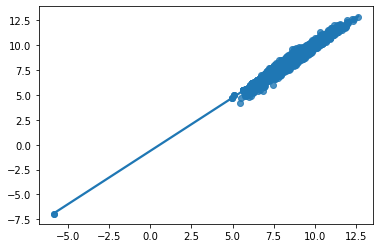

In [97]:
sns.regplot(pred_pka_acidic, pka_vals_new_acidic)

/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

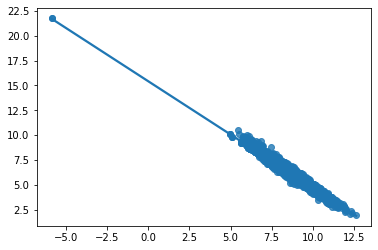

In [101]:
reg4=RandomForestRegressor()
reg4.fit(full_new_basic,pka_vals_new_basic)
pred_pka_basic=reg3.predict(full_new_basic)
    
r2(pka_vals_new_basic,pred_pka_basic)
sns.regplot(pred_pka_basic, pka_vals_new_basic)

In [102]:
import joblib

filename = 'pka_model_basic.sav'
joblib.dump(reg, filename) 

['pka_model_basic.sav']

In [103]:
loaded_basic_model = joblib.load('pka_model_basic.sav')

In [108]:
smiles='CC(C)C(=O)OCC1C(C(C(O1)N2C=CC(=NC2=O)NO)O)O'
mols=[Chem.MolFromSmiles(smiles)]

for mol in mols:
    AllChem.Compute2DCoords(mol)
Z = []
for mol in mols:
    arr = np.zeros((0,))
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
    DataStructs.ConvertToNumpyArray(fp, arr)
    Z.append(arr)

In [109]:
loaded_acidic_model.predict(Z)

array([9.2319429])

In [110]:
loaded_basic_model.predict(Z)

array([1.70628333])

In [111]:
print("Average:")
(loaded_acidic_model.predict(Z)+loaded_basic_model.predict(Z))/2

Average:


array([5.46911312])

In [112]:
from rdkit.Chem import PandasTools

SDFFile = "mols.sdf"
BRDLigs = PandasTools.LoadSDF(SDFFile)

pkas=BRDLigs['pka']
mols=BRDLigs['ROMol']


import numpy as np

smi=[]
pkas=[]

for i in np.arange(0,mols.shape[0]):
        try:
            sm = Chem.MolToSmiles(mols[i])
            smi.append(sm)
            pkas.append(BRDLigs['pka'][i])
        except:
            pass
        
smi=np.array(smi)

pkas=np.array(pkas)

m=[Chem.MolFromSmiles(i) for i in smi] 

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs

for mol in m:
    AllChem.Compute2DCoords(mol)
test = []
for mol in m:
    arr = np.zeros((0,))
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
    DataStructs.ConvertToNumpyArray(fp, arr)
    test.append(arr)
        
        
        
        

RDKit WARNING: [13:28:44] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:44] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:44] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:44] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:44] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:44] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:44] Warning: molecule is

RDKit WARNING: [13:28:46] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:46] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:46] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:46] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [

RDKit WARNING: [13:28:48] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:48] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:49] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:49] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:49] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:49] Warni

RDKit WARNING: [13:28:50] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:51] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:51] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:51] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:51] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:51] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:51] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:51] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:51] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:51] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:51] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:51] Warning: molecule is

[13:28:53] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:53] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:53] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:53] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:53] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:53] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:53] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:53] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:53] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:53] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:53] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:53] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:53] Warning: molecule is

[13:28:55] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:55] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:55] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:55] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:55] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:55] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:55] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:55] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:55] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:55] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:55] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:55] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:55] Warning: molecule is tagged as 3D, 

RDKit WARNING: [13:28:57] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:57] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:57] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:57] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:57] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:57] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:57] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:57] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:57] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:57] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:57] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:57] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:58] Warning: molecule is

RDKit WARNING: [13:28:59] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:59] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:59] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:59] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:59] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:59] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:59] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:28:59] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:59] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:28:59] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:29:00] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:29:00] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:29:00] Warning: molecule is

In [113]:
test_pkas_1=loaded_acidic_model.predict(test)
test_pkas_2=loaded_basic_model.predict(test)

In [114]:
pkas=[float(i) for i in pkas]

In [115]:
test_pkas=[]

for i in np.arange(0,test_pkas_1.shape[0]):
    test_pkas.append((test_pkas_1[i]+test_pkas_2[i])/2)

In [116]:
#import necessary libraries
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
sqrt(mean_squared_error(test_pkas, pkas))

4.949483919261131

In [117]:
sqrt(mean_squared_error(test_pkas_1, pkas))

3.7460482115681164

In [118]:
sqrt(mean_squared_error(test_pkas_2, pkas))

7.8903916829666505